In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
print(tf.__version__)

2.8.0


In [102]:
train_dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'

# Downloads a file from a URL if it not already in the cache.
train_dataset_file = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url), origin=train_dataset_url)
print(train_dataset_file)

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df = pd.read_csv(train_dataset_url)
df.columns = column_names

print(df.head())

/Users/imseongbin/.keras/datasets/iris_training.csv
   sepal_length  sepal_width  petal_length  petal_width  species
0           6.4          2.8           5.6          2.2        2
1           5.0          2.3           3.3          1.0        1
2           4.9          2.5           4.5          1.7        2
3           4.9          3.1           1.5          0.1        0
4           5.7          3.8           1.7          0.3        0


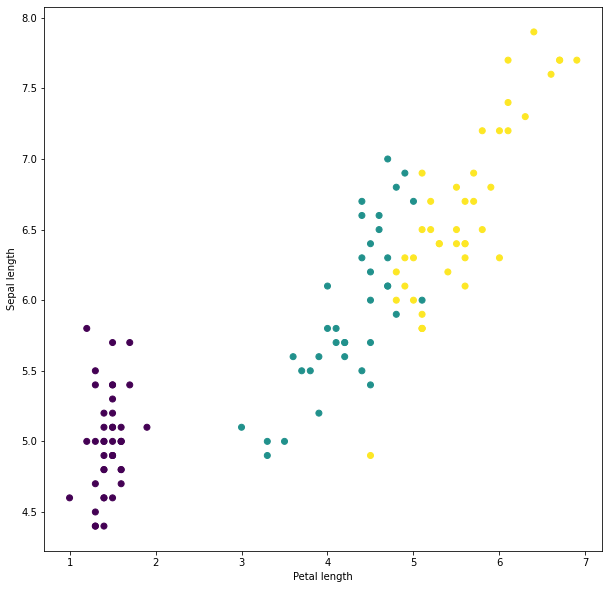

In [103]:
# 전체적인 그래프 크기 지정
plt.figure(figsize=(10,10)) 
# plt.scatter(x, y, c=color, s=size, cmap=colormap)
plt.scatter(df['petal_length'], 
            df['sepal_length'],
            c=df['species'], 
            cmap='viridis')

# x, y축 이름 지정
plt.xlabel("Petal length") 
plt.ylabel("Sepal length") 
plt.show()

In [113]:
# Create DataSet
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

feature_names = column_names[0:-2]
label_name = column_names[-1]

batch_size = 32
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_file, 
    batch_size, 
    column_names=column_names, 
    label_name=label_name,
    num_epochs=1)

features, labels = next(iter(train_dataset))

print(f"features \n {features}")
print(f"labels \n {labels}")


features 
 OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.2, 5.5, 4.8, 6.3, 5. , 6.4, 5.8, 5. , 5.1, 6.8, 5.2, 4.9, 7.4,
       5.1, 7.7, 5.8, 6.6, 5.8, 6.4, 4.7, 4.9, 4.8, 4.4, 7.3, 5. , 4.6,
       6. , 6.6, 6. , 7. , 6.7, 5.7], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.8, 2.6, 3.4, 3.3, 3.4, 2.8, 4. , 3.5, 3.7, 3. , 3.5, 2.5, 2.8,
       2.5, 2.8, 2.7, 3. , 2.8, 3.2, 3.2, 2.4, 3. , 2.9, 2.9, 3. , 3.6,
       2.7, 2.9, 2.9, 3.2, 3.1, 3.8], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.8, 4.4, 1.6, 4.7, 1.6, 5.6, 1.2, 1.3, 1.5, 5.5, 1.5, 4.5, 6.1,
       3. , 6.7, 5.1, 4.4, 5.1, 5.3, 1.3, 3.3, 1.4, 1.4, 6.3, 1.6, 1. ,
       5.1, 4.6, 4.5, 4.7, 4.4, 1.7], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.8, 1.2, 0.2, 1.6, 0.4, 2.1, 0.2, 0.3, 0.4, 2.1, 0.2, 1.7, 1.9,
       1.1, 2. , 1.9, 1.4, 2.4, 2.3, 0.2, 1. , 0.1

In [114]:
# transform
# 각각의 feature 데이터들이 1보다 크거나 다양한 범위의 데이터를 가지고 있음 -> 추후에 더 넓은 범위의 데이터가 들어오게 되면 학습에 영향이 생길 수 있음
# 이러한 사이드 이팩트를 줄이기 위해서 feature scaling이라는 정규화 작업을 거쳐야하며, Map 함수를 통해서 가능
# 추가로 현재 key-value 형식으로 각 feature들이 정의되어 있는데 이를 합치기 위해서는 tf.stack을 사용해야한다.

sepal_length_max = df['sepal_length'].max()
sepal_width_max = df['sepal_width'].max()
petal_length_max = df['petal_length'].max()
petal_width_max = df['petal_width'].max()

def scale(features, labels):
    features['sepal_length'] = features['sepal_length'] / sepal_length_max
    features['sepal_width'] = features['sepal_width'] / sepal_width_max
    features['petal_length'] = features['petal_length'] / petal_length_max
    features['petal_width'] = features['petal_width'] / petal_width_max
    features = tf.stack(list(features.values()), axis=1)

    return features, labels

train_dataset=train_dataset.map(scale)
features, labels = next(iter(train_dataset))

print(f"features \n {features}")

Tensor("stack:0", shape=(None, 4), dtype=float32)
features 
 [[0.6455696  0.8636363  0.2753623  0.16      ]
 [0.62025315 0.70454544 0.2173913  0.04      ]
 [0.60759497 0.6818182  0.20289855 0.12      ]
 [0.84810126 0.70454544 0.6376812  0.56      ]
 [0.62025315 0.5681818  0.6521739  0.68      ]
 [0.93670887 0.6363636  0.88405794 0.76      ]
 [0.60759497 0.77272725 0.23188406 0.08      ]
 [0.62025315 0.54545456 0.47826084 0.4       ]
 [0.8101266  0.72727275 0.76811594 0.91999996]
 [0.84810126 0.6818182  0.7246377  0.68      ]
 [0.78481007 0.5        0.6521739  0.6       ]
 [0.72151893 0.6363636  0.5942029  0.52      ]
 [0.9113924  0.72727275 0.8695652  0.71999997]
 [0.79746836 0.75       0.6811594  0.64      ]
 [0.7468355  0.72727275 0.6956522  0.71999997]
 [0.59493667 0.72727275 0.18840578 0.08      ]
 [0.6455696  0.8636363  0.2173913  0.12      ]
 [0.6455696  0.84090906 0.2173913  0.16      ]
 [0.835443   0.6818182  0.6376812  0.56      ]
 [0.72151893 0.6363636  0.6521739  0.52      ]

In [98]:
# Create Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(4, )))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(3))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

hist = model.fit(train_dataset, epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 26ms/step - loss: 1.0879 - accuracy: 0.3500
Epoch 2/50


2022-05-14 18:52:53.185916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 9ms/step - loss: 1.0822 - accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0789 - accuracy: 0.6917
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0756 - accuracy: 0.7000
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0714 - accuracy: 0.7000
Epoch 6/50
4/4 [==============================] - 0s 7ms/step - loss: 1.0665 - accuracy: 0.7000
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0610 - accuracy: 0.7000
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 1.0543 - accuracy: 0.7000
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0460 - accuracy: 0.7000
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0374 - accuracy: 0.7000
Epoch 11/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0283 - accuracy: 0.7000
Epoch 12/50
4/4 [==============================] 

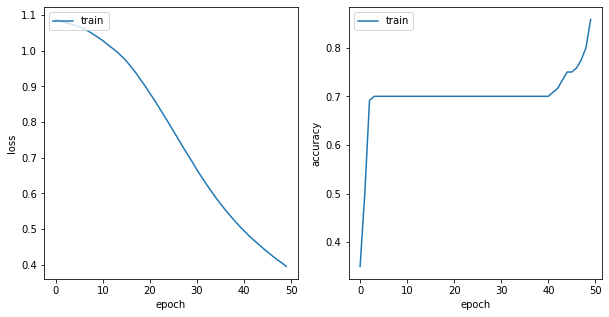

In [99]:
# draw loss and accuracy graph 
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1) 
plt.plot(hist.history['loss']) 
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['train'],loc='upper left')

plt.subplot(1,2,2) 
plt.plot(hist.history['accuracy']) 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train'],loc='upper left') 

plt.show()

In [100]:
predict_dataset = tf.convert_to_tensor([ [5.1, 3.3, 1.7, 0.5,],
[5.9, 3.0, 2.2, 1.5,],
[6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset, training=False)
for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name,
100*p))

Example 0 prediction: Iris setosa (49.7%)
Example 1 prediction: Iris virginica (98.2%)
Example 2 prediction: Iris virginica (99.9%)
